In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score
from statsmodels.stats.proportion import proportions_ztest
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

In [3]:
def load():
    data = pd.read_csv("diabetes.csv")
    return data

df = load()

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'], dtype='object')

In [8]:
df.tail

<bound method NDFrame.tail of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  Outcome
0              6      148             72             35        0 33.600                     0.627   50        1
1              1       85             66             29        0 26.600                     0.351   31        0
2              8      183             64              0        0 23.300                     0.672   32        1
3              1       89             66             23       94 28.100                     0.167   21        0
4              0      137             40             35      168 43.100                     2.288   33        1
5              5      116             74              0        0 25.600                     0.201   30        0
6              3       78             50             32       88 31.000                     0.248   26        1
7             10      115              0              0        0 35.300   

In [9]:
df.isnull

<bound method DataFrame.isnull of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  Outcome
0              6      148             72             35        0 33.600                     0.627   50        1
1              1       85             66             29        0 26.600                     0.351   31        0
2              8      183             64              0        0 23.300                     0.672   32        1
3              1       89             66             23       94 28.100                     0.167   21        0
4              0      137             40             35      168 43.100                     2.288   33        1
5              5      116             74              0        0 25.600                     0.201   30        0
6              3       78             50             32       88 31.000                     0.248   26        1
7             10      115              0              0        0 35.30

In [10]:
df.sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  Outcome
0              6      148             72             35        0 33.600                     0.627   50        1
1              1       85             66             29        0 26.600                     0.351   31        0
2              8      183             64              0        0 23.300                     0.672   32        1
3              1       89             66             23       94 28.100                     0.167   21        0
4              0      137             40             35      168 43.100                     2.288   33        1
5              5      116             74              0        0 25.600                     0.201   30        0
6              3       78             50             32       88 31.000                     0.248   26        1
7             10      115              0  

In [12]:
df.describe([0, 0.05, 0.50, 0.95, 0.99, 1])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
0%,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
5%,0.000,79.000,38.700,0.000,0.000,21.800,0.140,21.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
95%,10.000,181.000,90.000,44.000,293.000,44.395,1.133,58.000,1.000
99%,13.000,196.000,106.000,51.330,519.900,50.759,1.698,67.000,1.000
100%,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


In [14]:
check_df.(df)

SyntaxError: invalid syntax (2904543631.py, line 1)

In [17]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
df = df.iloc[:, 1:-1]
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.600,0.627,50
1,85,66,29,0,26.600,0.351,31
2,183,64,0,0,23.300,0.672,32
3,89,66,23,94,28.100,0.167,21
4,137,40,35,168,43.100,2.288,33


In [18]:
num_cols = [col for col in df.columns if df[col].dtype in [int, float]]

In [19]:
corr = df[num_cols].corr()

In [21]:
import seaborn as sns

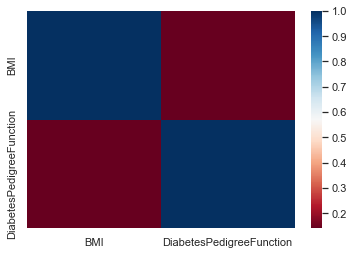

In [22]:
sns.set(rc={'figure.figsize': (12, 12)})
sns.heatmap(corr, cmap="RdBu")
plt.show()